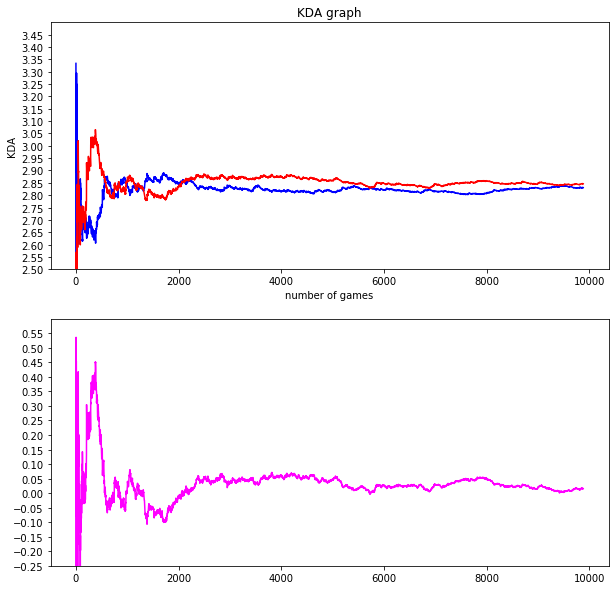

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
lol_data=pd.read_csv("data/high_diamond_ranked_10min.csv")


fig, ax=plt.subplots(2,1, figsize=(10,10))

KDA_df=pd.DataFrame()
KDA_df["game number"]=np.arange(1,len(lol_data+1))
KDA_df["blueKDA"]=(lol_data["blueKills"]+lol_data["blueAssists"])/lol_data["blueDeaths"]
KDA_df["redKDA"]=(lol_data["redKills"]+lol_data["redAssists"])/lol_data["redDeaths"]


games=KDA_df["game number"]
red=KDA_df["redKDA"]
blue=KDA_df["blueKDA"]

bluerolling=KDA_df["blueKDA"].rolling(10000, min_periods=1).mean()
redrolling=KDA_df["redKDA"].rolling(10000, min_periods=1).mean()
KDA_df["difference"]=redrolling-bluerolling

difference=KDA_df["difference"]

ax[0].plot(games,bluerolling, color="blue")
ax[0].plot(games, redrolling, color="red")
ax[0].set(xlabel="number of games", ylabel="KDA", title="KDA graph")
ax[0].set_ylim(2.5,3.5)
ax[0].set_yticks(np.arange(2.5, 3.5, 0.05))

ax[1].plot(games, difference, color="magenta")
plt.ylim(-.25,0.6)
plt.yticks(np.arange(-.25,.6,0.05))
plt.show()